Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


- Data from citybike.es, Foursquare and Yelp are added according to the count of POI within 1000 m from Forusquare and Yelp. 
- The API response from Foursquare return data for bars, restaurants, shops
- The API response from Yelp return data with landmarks and outdoor park.

In [2]:
# Open Data join from part save in csv file
citybike_df=pd.read_csv('/Users/tinapham/Desktop/lighthouse-data-notes/Week_5/Project draft/joindf_clean.cvs', sep=',')
citybike_df

,Station_name,Available_bikes,Empty_slots,Longitude,Latitude,Count_4SQUARE_POI,Count_Yelp_POI
0,Cégep Marie-Victorin,10,1,-73.606011,45.617500,11,0
1,Gare d'autocars de Montréal (Berri / Ontario),1,13,-73.564257,45.516926,50,14
2,Molson / William-Tremblay,4,9,-73.565012,45.541549,20,0
3,Ateliers municipaux de St-Laurent (Cavendish /...,9,8,-73.711186,45.506176,0,0
4,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),14,11,-73.682498,45.512994,22,0
...,...,...,...,...,...,...,...
757,Jean-Talon / de l'Épée,6,9,-73.624063,45.527487,43,0
758,Gare LaSalle (Highlands),6,10,-73.657136,45.425613,2,0
759,Métro St-Michel (Shaughnessy / St-Michel),4,11,-73.599488,45.559076,24,0
760,St-Hubert / René-Levesque,0,19,-73.556487,45.514369,50,0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

[Text(0.5, 1.0, 'Distribution of bikes availability across Montreal')]

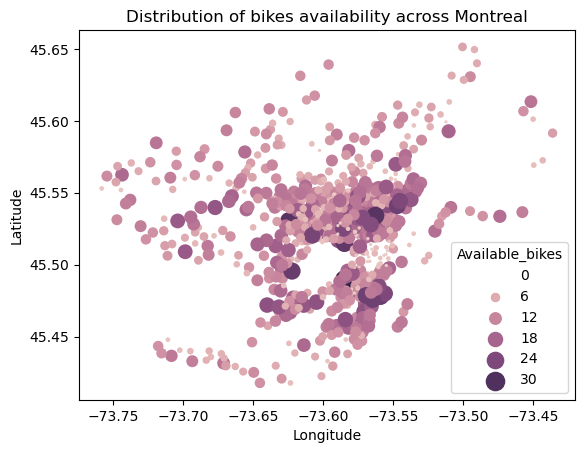

In [16]:
import seaborn as sns
# Scatterplot of distribution of available bike across Montreal
fig_1=sns.scatterplot(data=citybike_df,
            y ='Latitude',
            x ='Longitude',
            hue='Available_bikes',
            size='Available_bikes',
            sizes=(0, 200))
fig_1.set(title='Distribution of bikes availability across Montreal')


[Text(0.5, 1.0, 'Distribution of Restaurants and bars across Montreal')]

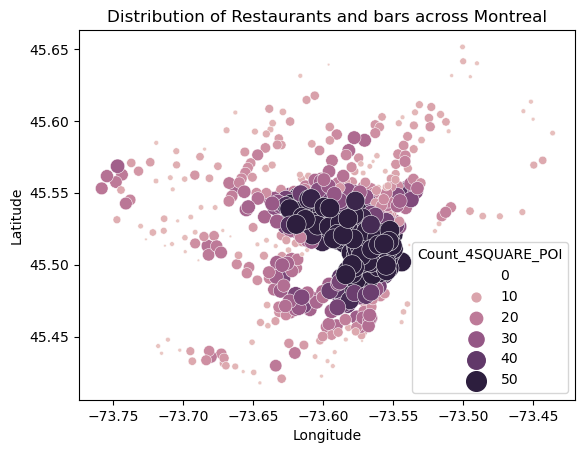

In [17]:
import seaborn as sns
# Scatterplot of distribution of Restaurants and bars across Montreal
fig_2=sns.scatterplot(data=citybike_df,
            y ='Latitude',
            x ='Longitude',
            hue='Count_4SQUARE_POI',
            size='Count_4SQUARE_POI',
            sizes=(0, 200))
fig_2.set(title='Distribution of Restaurants and bars across Montreal')

[Text(0.5, 1.0, 'Distribution of landmarks across Montreal')]

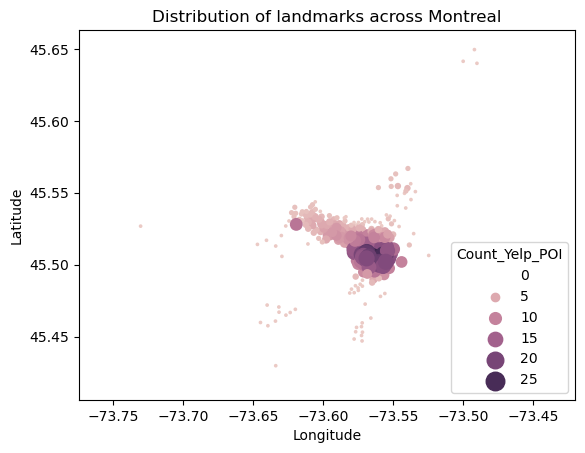

In [18]:
import seaborn as sns
# Scatterplot of distribution of landmarks across Montreal
fig_3=sns.scatterplot(data=citybike_df,
            y ='Latitude',
            x ='Longitude',
            hue='Count_Yelp_POI',
            size='Count_Yelp_POI',
            sizes=(0, 200))
fig_3.set(title='Distribution of landmarks across Montreal')

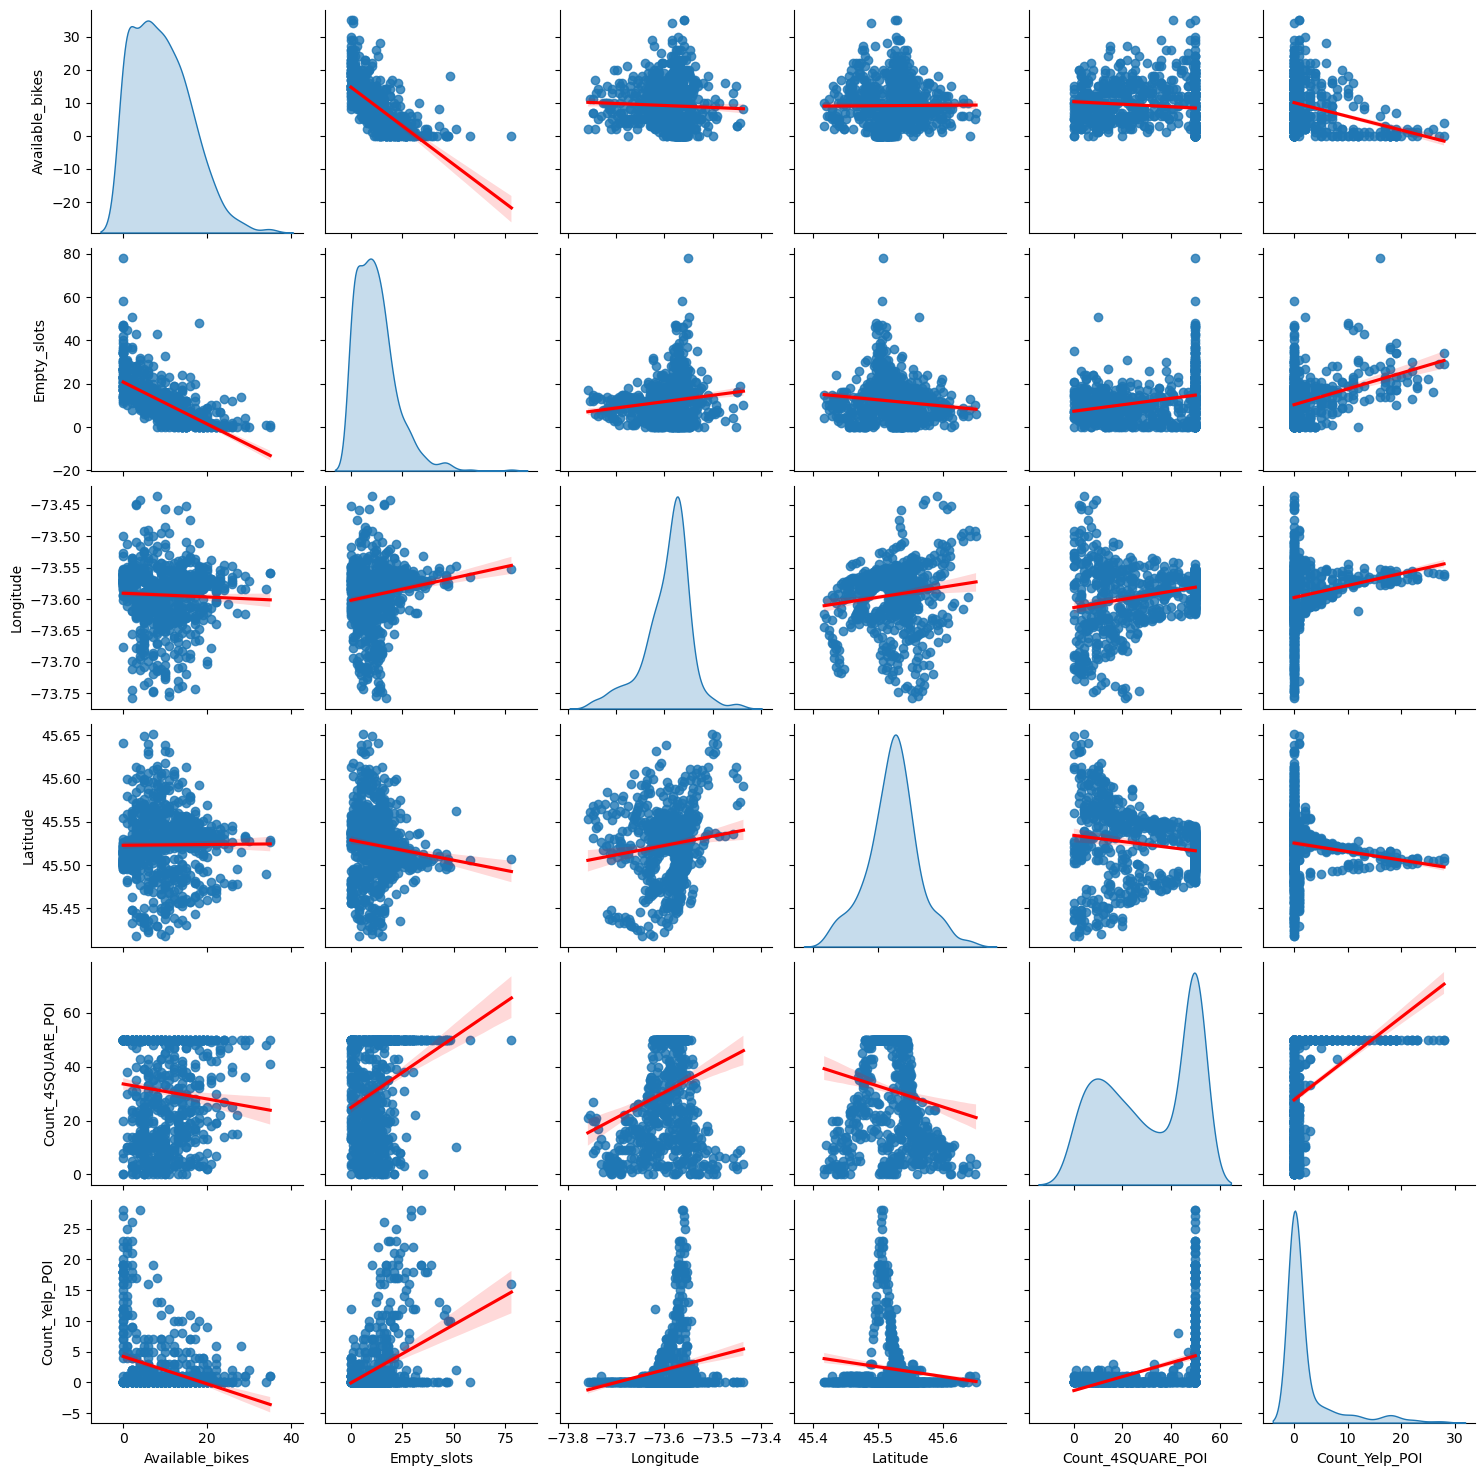

In [24]:
import seaborn as sns
# Pairplot of all subset in citybike dataframe
fig_5=sns.pairplot(data=citybike_df,
                    kind='reg', 
                    diag_kind='kde',
                    plot_kws={'line_kws':{'color':'red'}})
plt.show()

From the par plot:
- Available bike is right skewed showing low number of avaible bike distribute across the station. There are lower number of bike available at each station than the average number of bike
- Count of POI from Foursquare is left skewed with higher number of bar and restaurant available with 1000m radius of each station.
- Count of POI from Yelp is right skewed with a high number of zero landmark available within 1000 m radius of each station.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
import sqlite3
from sqlite3 import Error


Create the database in the data folder

In [18]:
import sqlite3
from sqlite3 import Error

# Create bikeshare database into the data folder
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_StatsModel_PythonProject/data/bikeshare.db")
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_StatsModel_PythonProject/data/bikeshare.db")


2.6.0


create the table in the database

In [19]:
# Create a connection to the database
conn = sqlite3.connect(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_StatsModel_PythonProject/data/bikeshare.db")
# Create a cursor object
c = conn.cursor()
# Create a table in the database to store citybike dataframe
c.execute("""CREATE TABLE IF NOT EXISTS stations (
                station_name TEXT , 
                availabke_bikes INTERGER NOT NULL, 
                empty_slots INTERGER NOT NULL,
                longitude FLOAT NOT NULL,
                latitude FLOAT NOT NULL,
                number_services INTERGER NOT NULL,
                number_landmark INTERGER NOT NULL
                );
        """)
# Insert the data from the dataframe into the table
for i, row in citybike_df.iterrows():
    c.execute("""INSERT INTO stations VALUES (?, ?, ?, ?, ?, ?, ?)""", row)
# Commit the changes to the database
conn.commit()
# Close the connection to the database
conn.close()

Look at the data before and after the join to validate your data.

In [20]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_StatsModel_PythonProject/data/bikeshare.db")
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [22]:
connection = create_connection("sm_app.sqlite")
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


select_stationname = "SELECT station_name from stations"
execute_read_query( connection, select_stationname )

Connection to SQLite DB successful


[('Cégep Marie-Victorin',),
 ("Gare d'autocars de Montréal (Berri / Ontario)",),
 ('Molson / William-Tremblay',),
 ('Ateliers municipaux de St-Laurent (Cavendish / Poirier)',),
 ('Place Rodolphe-Rousseau (Gohier / Édouard-Laurin)',),
 ('Centre des loisirs (Tassé / Grenet)',),
 ('Parc Marlborough (Beauzèle / Robichaud)',),
 ('Champdoré / de Lorimier',),
 ('Parc Villeray (Christophe-Colomb / Jarry)',),
 ('Beurling / Godin',),
 ('Kirkfield / de Chambois',),
 ('Parc des Rapides (LaSalle / 6e avenue)',),
 ('Métro Longueuil - Université de Sherbrooke',),
 ('St-Charles / Montarville',),
 ('Collège Édouard-Montpetit (de Gentilly / de Normandie)',),
 ('Place Longueuil',),
 ('Place du Commerce',),
 ('Marché Maisonneuve',),
 ('Parc Kent (de Kent / Hudson)',),
 ('Rachel / de Brébeuf',),
 ('Aréna Rodrigue-Gilbert (du Tricentenaire / de Montigny)',),
 ('Parc St-Laurent (Salk / Thomas-Chapais)',),
 ('Notre-Dame / St-Gabriel',),
 ('Casino de Montréal',),
 ('La Ronde',),
 ('U. Concordia - Campus Loyola